In [1]:
# load libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
from IPython.display import Image

For data integration, cleaning, and augmentation please check this notebook: **Augmenting Crimsonloop data** here [https://github.com/machaniG/machaniG.github.io/blob/master/notebooks/Augmenting%20Crimsonloop%20data.ipynb]

In [2]:
df = pd.read_csv("marketing_extended.csv")
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date_x,Product_SKU,Product_Description,Product_Category,Quantity,...,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Transaction_Date_y,purchases,clicks_online,impressions_online
0,14031,F,Chicago,17,19075,1/29/2019,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1,...,1/29/2019,700,836.13,1,ACC10,10,1/29/2019,99,4900,76323
1,15525,M,New York,48,17456,1/9/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/9/2019,5000,3287.83,1,AND10,10,1/9/2019,188,9306,144953
2,12947,M,California,48,17891,1/14/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/14/2019,5000,1920.57,1,AND10,10,1/14/2019,57,2821,43940
3,15923,F,Chicago,34,18470,1/21/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/21/2019,3000,640.93,1,AND10,10,1/21/2019,56,2772,43177
4,17581,M,California,25,18852,1/25/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/25/2019,1000,1124.95,1,AND10,10,1/25/2019,157,7772,121059


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  int64  
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  int64  
 4   Transaction_ID       52524 non-null  int64  
 5   Transaction_Date_x   52524 non-null  object 
 6   Product_SKU          52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  int64  
 10  Avg_UnitPrice        52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null 

In [4]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date_x,Product_SKU,Product_Description,Product_Category,Quantity,...,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Transaction_Date_y,purchases,clicks_online,impressions_online
0,14031,F,Chicago,17,19075,1/29/2019,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1,...,1/29/2019,700,836.13,1,ACC10,10,1/29/2019,99,4900,76323
1,15525,M,New York,48,17456,1/9/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/9/2019,5000,3287.83,1,AND10,10,1/9/2019,188,9306,144953
2,12947,M,California,48,17891,1/14/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/14/2019,5000,1920.57,1,AND10,10,1/14/2019,57,2821,43940
3,15923,F,Chicago,34,18470,1/21/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/21/2019,3000,640.93,1,AND10,10,1/21/2019,56,2772,43177
4,17581,M,California,25,18852,1/25/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/25/2019,1000,1124.95,1,AND10,10,1/25/2019,157,7772,121059


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date_x', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_UnitPrice', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct', 'Transaction_Date_y',
       'purchases', 'clicks_online', 'impressions_online'],
      dtype='object')

### Sales Behavior

In [6]:
# calculate total net sales excluding tax and delivery charges for each transaction by multiplying unit price by quantity purchased
#convert discount to decimal
df["Discount_pct"] = df["Discount_pct"] / 100

df["net_sales"] = df["Avg_UnitPrice"] * df["Quantity"] * (1 - df['Discount_pct'])
df["net_sales"].describe()

count    52524.000000
mean        70.780353
std        136.477625
min          0.287000
25%          9.513000
50%         24.500000
75%        104.300000
max       8545.500000
Name: net_sales, dtype: float64

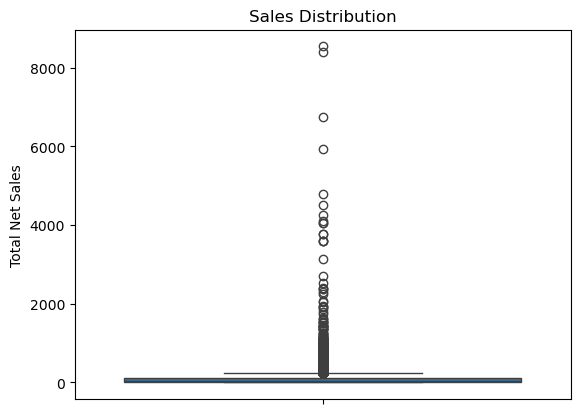

In [7]:
#sales distribution
sns.boxplot(data = df, y = "net_sales")
plt.ylabel("Total Net Sales")
plt.title("Sales Distribution")
plt.savefig("sales_distribution.png")
plt.show()

In [8]:
# function for barplots
def bar_graphs(df, x, y, palette):
    """plots without hue"""
    ax = sns.barplot(data = df, x = x, y = y, palette = palette, errorbar=None)
    #remove all grids
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    plt.tight_layout()
    return ax

def bar_graphs2(df, x, y, hue):
    """plots with hue"""
    ax = sns.barplot(data = df, x = x, y = y, hue = hue, errorbar=None)
    #remove all grids
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    #remove ticks
    ax.tick_params(bottom = False, left = False)
    plt.tight_layout()
    return ax

def horizontal_bars(df, x, y, palette):
    ax = sns.barplot(data = df, x = x, y = y, orient = 'h', errorbar = None, palette = palette)
    #remove all grids
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    #move the tick labels to the top of the graph using the Axes.xaxis.tick_top() method 
    # remove the top ticks instead of the bottom ones
    # color the x-tick labels, we use the same Axes.tick_params()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(top=False, left=False)
    plt.tight_layout()
    return ax

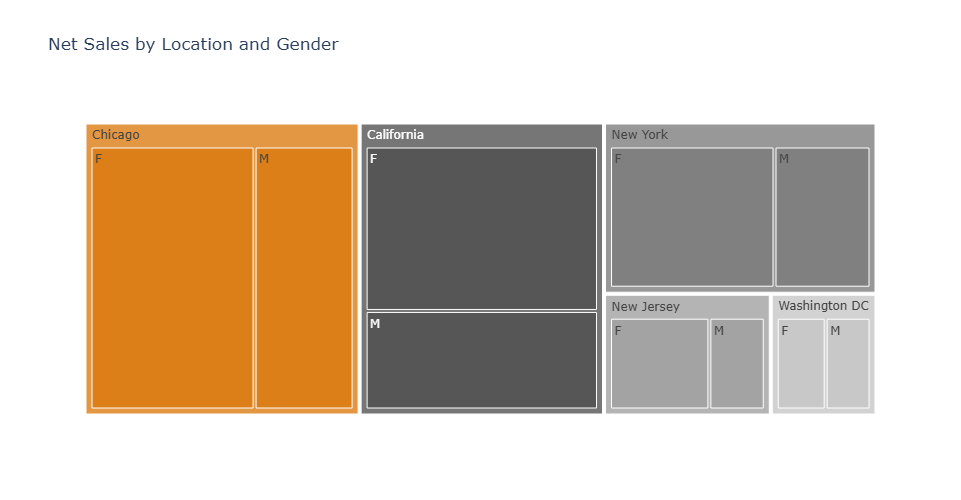

In [9]:
fig = px.treemap(
    df,
    path=["Location", "Gender"],
    values="net_sales",
    width=700,    
    height=500,
    title= "Net Sales by Location and Gender",
    color_discrete_sequence=["#dc7f18", "#565656", "#808080", "#a3a3a3", "#c8c8c8"]
)
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("treemap.png")  
Image("treemap.png")
fig.show()

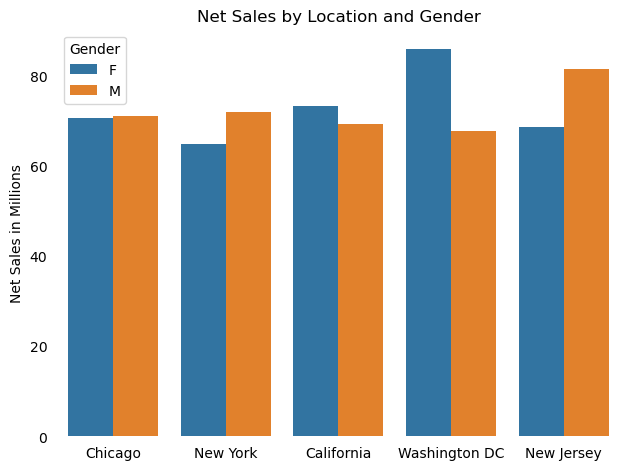

In [10]:
bar_graphs2(df, x="Location", y="net_sales", hue="Gender")
plt.title("Net Sales by Location and Gender")
plt.xlabel("")
plt.ylabel("Net Sales in Millions")
plt.show()

In [11]:
q_bycategory = df.groupby("Product_Category").agg({
    "Quantity": "sum",
    "net_sales": "sum",
    "net_sales": "mean",
    "CustomerID": "count",
    "Transaction_ID": "count"
}).sort_values("Quantity", ascending = False).reset_index()

q_bycategory

,Product_Category,Quantity,net_sales,CustomerID,Transaction_ID
0,Office,88383,34.274414,6513,6513
1,Apparel,32438,26.115964,18126,18126
2,Drinkware,30501,46.263345,3483,3483
3,Lifestyle,24881,19.548206,3092,3092
4,Nest-USA,21430,146.077050,14013,14013
5,Bags,15273,64.486038,1882,1882
6,Notebooks & Journals,9556,118.963672,749,749
7,Headgear,3533,56.810145,771,771
8,Nest,2837,183.670949,2198,2198
9,Housewares,2484,31.585361,122,122


In [12]:
import warnings
warnings.filterwarnings("ignore")

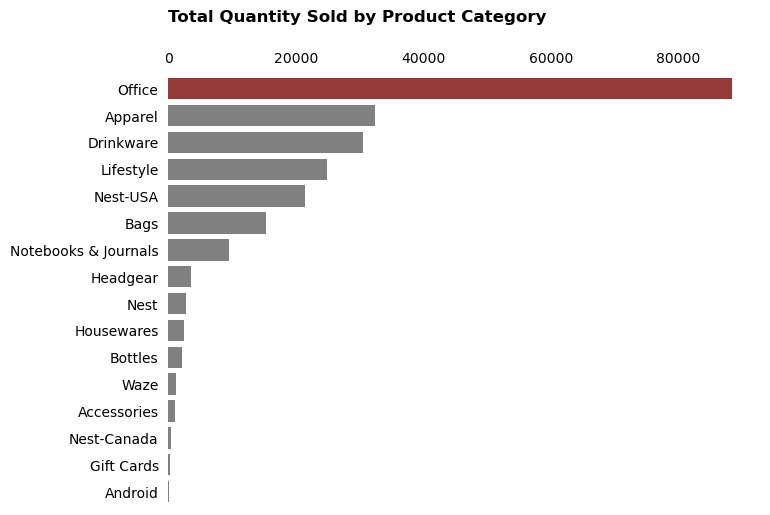

In [13]:
palette = ['brown' if (x > 40000)  else 'grey' for x in q_bycategory["Quantity"]] 
plt.figure(figsize = (8, 5))
ax = horizontal_bars(q_bycategory, x = "Quantity", y = "Product_Category", palette = palette)
 
ax.text(x=-0.1, y=-2.5, s="Total Quantity Sold by Product Category", fontsize = 12, weight = "bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Which Customers are High-value?

In [14]:
df["net_sales"].quantile([0.5, 0.75, 0.95, 0.99])

0.50     24.5
0.75    104.3
0.95    249.9
0.99    428.4
Name: net_sales, dtype: float64

## Business Insights
Most transactions are relatively small: The median is just 24.5.

There is a long tail: The gap between the median (24.5) and the 99th percentile (428.4) shows that while most transactions are modest, a small number are much larger.

**High-value customers:** 

The top 5% and especially the top 1% of transactions are significantly higher, which may indicate VIP or bulk buyers.

The top 1% are rare, very high-value transactions.

### Top 5% Customers by Spend

In [15]:
cutoff = df["net_sales"].quantile(0.95)

high_value = df[df["net_sales"] > cutoff]

high_value["CustomerID"].nunique()

807

In [16]:
df["CustomerID"].nunique()

1468

In [17]:
one_percent = df["net_sales"].quantile([0.99]).iloc[0]
top_1_percent = df[df["net_sales"] > one_percent]
top_1_percent["CustomerID"].nunique()

299

Out of 1,468 customers, 807 are VIP or bulk buyers and 299 customers out of the 807 VIPs are very high-value customers.

In [18]:
high_value["purchases"].count()

2585

### Top 1% spenders 

In [19]:
# top 1 percent customers
top_1_percent[["net_sales", "Quantity"]].describe()

,net_sales,Quantity
count,514.000000,514.000000
mean,825.064451,82.550584
std,846.382776,142.733378
min,430.650000,2.000000
25%,488.775000,5.000000
50%,558.400000,15.000000
75%,786.707250,100.000000
max,8545.500000,900.000000


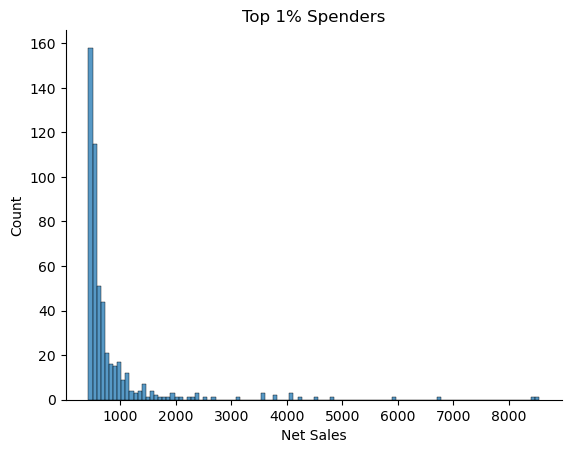

In [20]:
ax = sns.histplot(data = top_1_percent, x = "net_sales")
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
plt.title("Top 1% Spenders")
plt.xlabel("Net Sales")
plt.savefig("top1_percent.png")
plt.show()

### Ultra high-value customers by spend

Transactions above 1k

In [21]:
# above 1k
above_1k = df[df["net_sales"] > 1000]
above_1k[["net_sales", "Quantity"]].describe()

,net_sales,Quantity
count,80.000000,80.000000
mean,2124.159625,221.887500
std,1588.133016,195.177556
min,1004.400000,4.000000
25%,1116.000000,74.250000
50%,1424.304000,147.000000
75%,2365.200000,336.250000
max,8545.500000,791.000000


In [22]:
above_1k["CustomerID"].nunique()

41

There 80 transactions above 1k and these were all bulk purchases, at least 4 units. Although some bought cheap products, some of them bought expensive products. A total of 41 customers account for these transactions.

### Customer Segmentation: Rule-Based

#### **Business Impact & Insights**

- **High-value customer focus:**

The 41 customers with transactions above 1,000 represent a small but extremely valuable segment. Targeting them with personalized offers, loyalty programs, or exclusive services can drive significant revenue growth.

- **Top percentile leverage:**
  
The 807 (95th percentile) and 299 (99th percentile) customers are critical for sustaining and growing the business. Understanding their preferences, purchase patterns, and demographics (e.g., location, gender) can help to tailor marketing and retention strategies.

#### Customer Segmentation: Rule-Based

- VIP/Elite tier: The 41 ultra high-value customers
- Premium tier: The 258 in the 99th percentile
- Loyalty tier: The 508 in the 95th percentile
- Regular: The rest of the customers, 661

In [23]:
vip = df[df["net_sales"] > 1000]
premium =  df[(df["net_sales"] > one_percent) & (~df["CustomerID"].isin(vip["CustomerID"]))]
loyalty = df[(df["net_sales"] > cutoff) & (~df["CustomerID"].isin(premium["CustomerID"])) & (~df["CustomerID"].isin(vip["CustomerID"]))]

print(vip["CustomerID"].nunique())
print(premium["CustomerID"].nunique())
print(loyalty["CustomerID"].nunique())

print("Vip transactions:", vip["CustomerID"].count())
print("Premium transactions:", premium["CustomerID"].count())
print("Loyalty transactions:", loyalty["CustomerID"].count())

41
258
508
Vip transactions: 80
Premium transactions: 370
Loyalty transactions: 1083


In [24]:
regular = df[(df["net_sales"] <= cutoff) & (~df["CustomerID"].isin(premium["CustomerID"])) \
& (~df["CustomerID"].isin(vip["CustomerID"])) & (~df["CustomerID"].isin(loyalty["CustomerID"]))]


print("Regular transactions:", regular["CustomerID"].count())
print("Regular customers:", regular["CustomerID"].nunique())
print("Total customers:", df["CustomerID"].nunique())

Regular transactions: 9993
Regular customers: 661
Total customers: 1468


In [25]:
# Initialize segment column with NaNs
df["segment"] = np.nan
df["segment"] = pd.Series(dtype="object")

# Assign segments in order of exclusivity
df.loc[df["CustomerID"].isin(vip["CustomerID"]), "segment"] = "VIP Tier"

df.loc[
    (df["CustomerID"].isin(premium["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Premium Tier"

df.loc[
    (df["CustomerID"].isin(loyalty["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Loyalty Tier"

df.loc[
    (df["CustomerID"].isin(regular["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Regular"


## Machine Learning-Driven Segmentation (K-Means Clustering)

To validate and potentially discover deeper, data-driven segments, I also applied K-means clustering using key RFM (Recency, Frequency, Monetary) features. This unsupervised learning approach provided an alternative perspective on natural customer groupings.

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import datetime

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date_x', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_UnitPrice', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct', 'Transaction_Date_y',
       'purchases', 'clicks_online', 'impressions_online', 'net_sales',
       'segment'],
      dtype='object')

#### Calculate RFM features from the transaction data

In [28]:
# Convert Transaction_Date_x to datetime format
df['Transaction_Date_x'] = pd.to_datetime(df['Transaction_Date_x'])

# Assuming 'net_sales' for Monetary, 'Transaction_ID' for Frequency, and 'Transaction_Date_x' for Recency
# Use the most recent transaction date as reference
current_date = df['Transaction_Date_x'].max() 

rfm_data = df.groupby('CustomerID').agg(
    Recency = ('Transaction_Date_x', lambda date: (current_date - date.max()).days),
    Frequency = ('Transaction_ID', 'count'),
    Monetary = ('net_sales', 'sum')
).reset_index()


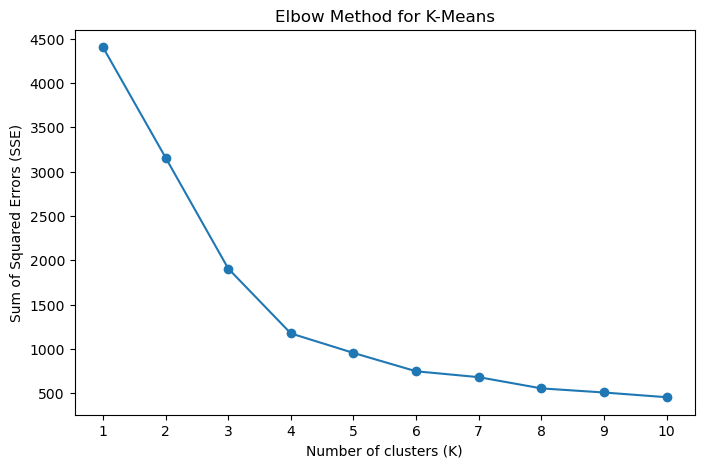

In [29]:
# Scale features for K-Means to ensure equal weighting
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Elbow method to search for optimal clusters
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)   # WCSS

# 4. Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for K-Means')
plt.xticks(K_range)
plt.grid(False)
plt.savefig("elbow_method.png")
plt.show()

In [30]:
# Apply K-Means clustering (e.g., for an optimal number of clusters, determined via elbow method/silhouette score)
# For demonstration, let's assume optimal K=4 clusters
kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10) # n_init is set to 'auto' or explicit value in newer scikit-learn
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# reduce dimensionality
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_data['pca1'] = rfm_pca[:, 0]
rfm_data['pca2'] = rfm_pca[:, 1]

In [31]:
#Get Unique Segment per Customer
customer_segments = df[['CustomerID', 'segment']].drop_duplicates(subset='CustomerID')
# Merge Segment information to rfm data
rfm_data = rfm_data.merge(customer_segments, on='CustomerID', how='left')

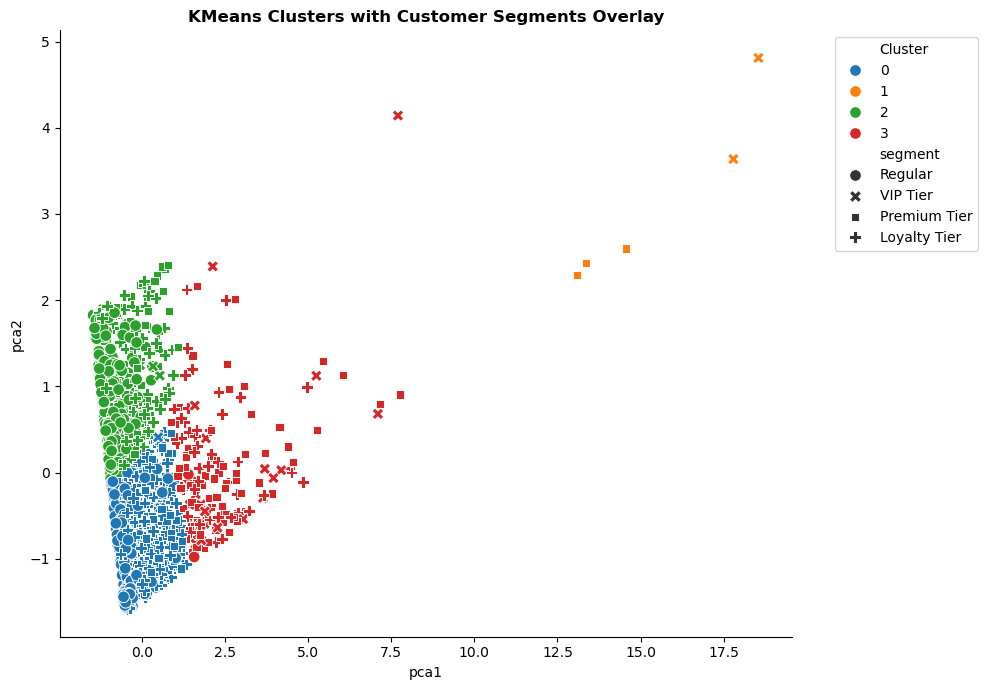

In [32]:
#visualize
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=rfm_data, x='pca1', y='pca2',
    hue = 'Cluster',      # KMeans clusters
    style = 'segment',    # Restored segments after merge
    palette = 'tab10',
    s = 70)
for location in ["top", "right"]:
    ax.spines[location].set_visible(False)
ax.grid(False)    

plt.title('KMeans Clusters with Customer Segments Overlay', weight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Kmeans_clusters.png")
plt.show()

#### Quantitative Overlap Check 

You can check how much the clusters and segments overlap with a crosstab:

In [33]:
pd.crosstab(rfm_data['segment'], rfm_data['Cluster'])

Cluster,0,1,2,3
segment,,,,
Loyalty Tier,296,0,157,55
Premium Tier,123,3,58,74
Regular,328,0,331,2
VIP Tier,9,2,6,24


## Investigate High-Value Transactions

## Ultra high-value VIP customers

In [34]:
vip["CustomerID"].nunique()

41

In [35]:
vip_summary = vip.groupby("CustomerID").agg({
    "net_sales": "sum",
    "Transaction_ID": "count",
    "Quantity": "sum",
    "Delivery_Charges": "sum",
    "Location": "first",
    "Gender": "first"
}).reset_index()

top_10 = vip_summary.sort_values("net_sales", ascending = False)
print("The Top 10 Customers by Net Sales:")
print("\n")
top_10.head(10)

The Top 10 Customers by Net Sales:




,CustomerID,net_sales,Transaction_ID,Quantity,Delivery_Charges,Location,Gender
25,15311,25976.304,9,2144,57.00,Chicago,F
6,12748,16633.458,4,1238,273.42,Chicago,F
18,14180,13188.708,5,1388,30.00,California,F
9,13113,11893.500,3,1750,19.50,New Jersey,M
22,14667,11347.596,5,836,30.00,California,F
24,15194,9523.512,2,951,12.00,Chicago,M
10,13267,8394.400,2,700,12.00,California,M
26,15351,6775.648,4,1444,26.00,Washington DC,F
39,17975,6329.016,3,976,18.00,Chicago,M
0,12347,5290.677,4,189,26.00,New York,M


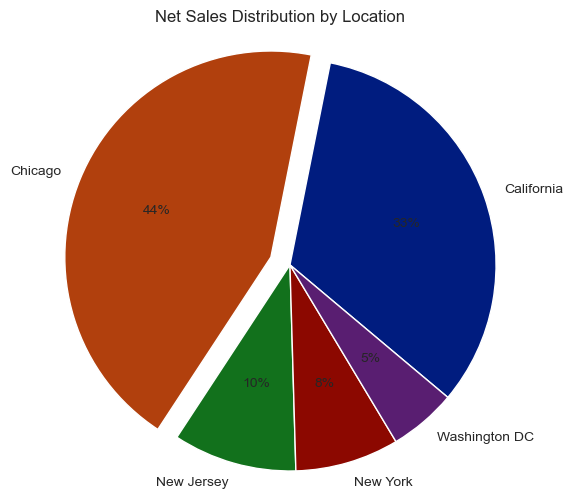

In [36]:
# sales distribution by location
data = vip.groupby("Location")["net_sales"].sum()
labels = data.index
sizes = data.values

# declaring exploding pie & colors
explode = [0, 0.1, 0, 0, 0]
palette_color = sns.color_palette('dark')

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,  colors=palette_color, explode=explode, autopct='%.0f%%', startangle= 320)
plt.title("Net Sales Distribution by Location")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

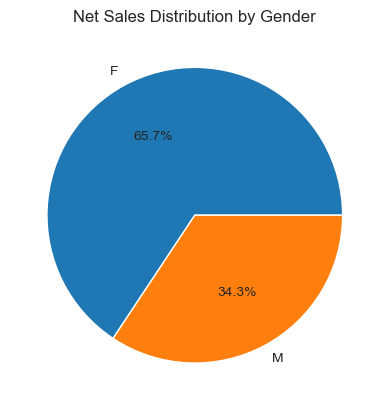

In [37]:
# sales distribution by gender
data = vip.groupby("Gender")["net_sales"].sum()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.title("Net Sales Distribution by Gender")
plt.show()

In [38]:
#colors "#b6b6b6", "#ad372c"
vip_summary2 = vip_summary.reset_index()

fig = px.bar(
    vip_summary, 
    x="net_sales", 
    y="Location", 
    color="Gender", 
    orientation='h',
    title="<b>VIP Sales by Location and Gender</b>",
    hover_data=["CustomerID", "Quantity"],
    color_discrete_sequence=["#678199", "#9E7C92"]
)

fig.update_layout(
    xaxis_title="",
    yaxis_title=""
)
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("vipsales_loc_gender.png")  
Image("vipsales_loc_gender.png")
fig.show()

WARNING	Thread(Thread-10 (run)) Task(Task-45) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


In [39]:
# Sort and pick top 3
top3 = vip_summary2.nlargest(3, "net_sales")

# Assign color
vip_summary2["bar_color"] = vip_summary2.apply(
    lambda row: "#ad372c" if row["CustomerID"] in top3["CustomerID"].values else "#b6b6b6",
    axis=1
)


fig = px.bar(
    vip_summary2,
    x="Location",         
    y="net_sales",
    color="bar_color",     # use bar_color for styling
    hover_data=["CustomerID", "Quantity"],
    title="Top 3 VIP Net Sales Highlighted",
    color_discrete_map="identity",  # Use hex codes as-is
    width=600,
    height=500
)

fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    #showlegend=False  # Hide legend since color is not a category
)
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("top3_vipsales.png")  
Image("top3_vipsales.png")
fig.show()

In [40]:
# Group by both Location and Gender, then count unique customers
gender_summary = vip.groupby(["Location", "Gender"])["CustomerID"].nunique().reset_index()

# Rename the column for clarity
gender_summary.rename(columns={"CustomerID": "Unique_Customers"}, inplace=True)

In [41]:
fig = px.bar(
    gender_summary, 
    x="Unique_Customers", 
    y="Location", 
    color="Gender", 
    orientation='h',
    title = "<b>VIP Customers</b>",
    color_discrete_sequence=["#678199", "#9E7C92"]
)

fig.update_layout(
    xaxis_title="",
    yaxis_title=""
)
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("vip_customers.png")  
Image("vip_customers.png")
fig.show()


### Product Category Analysis for High-Value Transactions

#### **Business Impact:**

Discover which categories drive the most revenue from big spenders and inform inventory, promotions, and procurement.

In [42]:
category = vip.groupby("Product_Category")["net_sales"].agg(
    ["count", "sum", "mean"]).sort_values("sum", ascending=False)
category

,count,sum,mean
Product_Category,,,
Apparel,26,43111.933,1658.151269
Notebooks & Journals,12,37480.466,3123.372167
Office,13,25754.482,1981.114000
Headgear,4,22314.044,5578.511000
Drinkware,10,19078.737,1907.873700
Bags,8,12995.108,1624.388500
Nest,6,6835.500,1139.250000
Lifestyle,1,2362.500,2362.500000


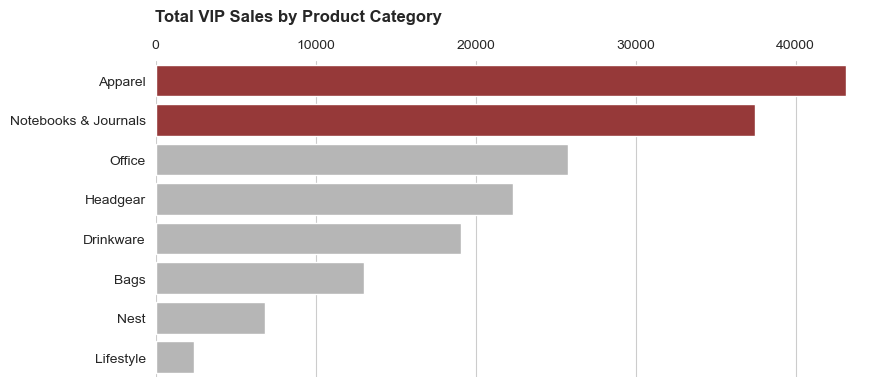

In [43]:
# call horizontal_bars we created above to plot sales by product category
colors = ['brown' if (x > 30000)  else "#b6b6b6" for x in category["sum"]] 
plt.figure(figsize = (9, 4))
fig = horizontal_bars(category, x = "sum", y = "Product_Category", palette = colors)
fig.text(x=-30, y=-1.5, s="Total VIP Sales by Product Category", fontsize = 12, weight = "bold")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("vip sales_bycategory.png")
plt.show()

#### Distribution of transactions by category

### Which products are mostly bought by vip customers?

In [44]:
products = vip.groupby("Product_Category").agg({
    "Transaction_ID": "count",
    "CustomerID": "count",
    "Quantity": "sum",
    "net_sales": "sum"
}).sort_values("net_sales", ascending = False)

products

,Transaction_ID,CustomerID,Quantity,net_sales
Product_Category,,,,
Apparel,26,26,2303,43111.933
Notebooks & Journals,12,12,3511,37480.466
Office,13,13,4514,25754.482
Headgear,4,4,1782,22314.044
Drinkware,10,10,2047,19078.737
Bags,8,8,2815,12995.108
Nest,6,6,29,6835.500
Lifestyle,1,1,750,2362.500


WARNING	Thread(Thread-16 (run)) Task(Task-168) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


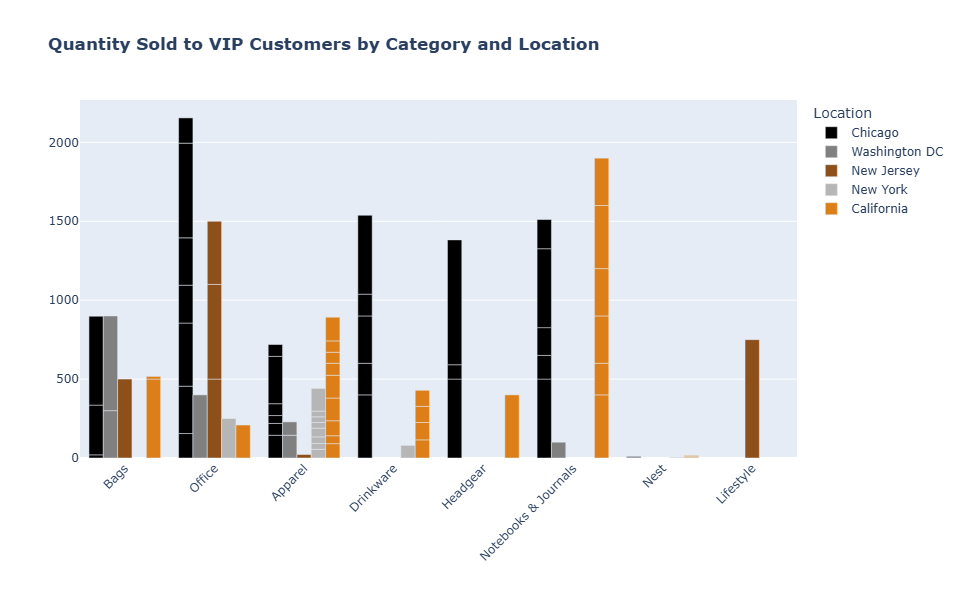

In [45]:
fig = px.bar(
    vip,
    x = "Product_Category",         
    y = "Quantity",
    color = "Location",  
    barmode="group",
    title = "<b>Quantity Sold to VIP Customers by Category and Location</b>",
    width=900,
    height=600,
    color_discrete_sequence=["black", "gray", "#8e501b", "#b6b6b6", "#dc7f18"]
)

fig.update_layout(
    xaxis_title="",
    yaxis_title=""
    #paper_bgcolor='rgba(0,0,0,0)',
    #plot_bgcolor='rgba(0,0,0,0)'
    #showlegend=False  # Hide legend since color is not a category
)
fig.update_xaxes(tickangle= -45)

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("vip_quantity.png")  
Image("vip_quantity.png")
fig.show()

## Temporal Trends of High-Value Transactions

### **Business Impact:**

Identify seasonality, campaign impact, or anomalies in high-value sales—optimize timing for marketing and restocking.

In [46]:
vip["Transaction_Date"] = pd.to_datetime(vip["Transaction_Date_x"])
monthly_trend = vip.groupby(vip["Transaction_Date"].dt.to_period("M"))["net_sales"].sum().reset_index()
monthly_trend["Month"] = monthly_trend["Transaction_Date"].dt.to_timestamp()
monthly_trend


,Transaction_Date,net_sales,Month
0,2019-01,2802.015,2019-01-01
1,2019-02,8371.648,2019-02-01
2,2019-03,7213.927,2019-03-01
3,2019-04,75827.133,2019-04-01
4,2019-05,1105.832,2019-05-01
5,2019-06,4316.522,2019-06-01
6,2019-07,27824.472,2019-07-01
7,2019-08,27735.008,2019-08-01
8,2019-09,1010.905,2019-09-01
9,2019-10,5544.027,2019-10-01


In [47]:
vip["Transaction_Date"] = pd.to_datetime(vip["Transaction_Date_x"])

# Create a 'Month' column for grouping
vip["Monthly"] = vip["Transaction_Date"].dt.month_name()

# aggregate by month since we have multiple transactions per month
# Plotly will plot all points unless we don't aggregate, so for a clean trend line we aggregate first:

monthly_trend = vip.groupby("Monthly")["net_sales"].sum().reset_index()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert month column to categorical type
monthly_trend['Monthly'] = pd.Categorical(monthly_trend['Monthly'], categories=month_order, ordered=True)

# Sort by calendar order
monthly_trend = monthly_trend.sort_values('Monthly')


In [48]:
fig = px.line(
    monthly_trend,
    x="Monthly",
    y="net_sales",
    markers=True,
    title="Monthly Net Sales Trend (High Value Customers)",
)

fig.update_layout(
    xaxis_title="",
    yaxis_title="Total Net Sales",
    width=800,
    height=550,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(tickangle= -45)
fig.update_traces(line_color = "#8e501b")
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("monthlysales.png")  
Image("monthlysales.png")
fig.show()

There was a spike of sales in April

#### Aggregate Transaction Counts and Amounts by Day

In [49]:
# transactions per day
# Group by date for transaction count
daily_counts = vip.groupby(vip["Transaction_Date"].dt.date).size().reset_index(name="transaction_count")

fig1 = px.line(
    daily_counts,
    x="Transaction_Date",
    y="transaction_count",
    markers=True,
    title="Daily Transaction Count",
    width=900,
    height=500
)
fig1.update_layout(xaxis_title="", yaxis_title="Number of Transactions",
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)'
)

fig1.update_traces(line_color = "#8e501b")
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("dailytrans.png")  
Image("dailytrans.png")
fig1.show()

In [50]:
# Group by date for net sales sum
daily_sales = vip.groupby(vip["Transaction_Date"])["net_sales"].sum().reset_index()

fig2 = px.line(
    daily_sales,
    x="Transaction_Date",
    y="net_sales",
    markers=True,
    title="Daily Net Sales",
    width=900,
    height=500
)
fig2.update_layout(xaxis_title="", yaxis_title="Net Sales"
)

fig2.update_traces(line_color = "#8e501b")

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("dailysales.png")  
Image("dailysales.png")
fig2.show()

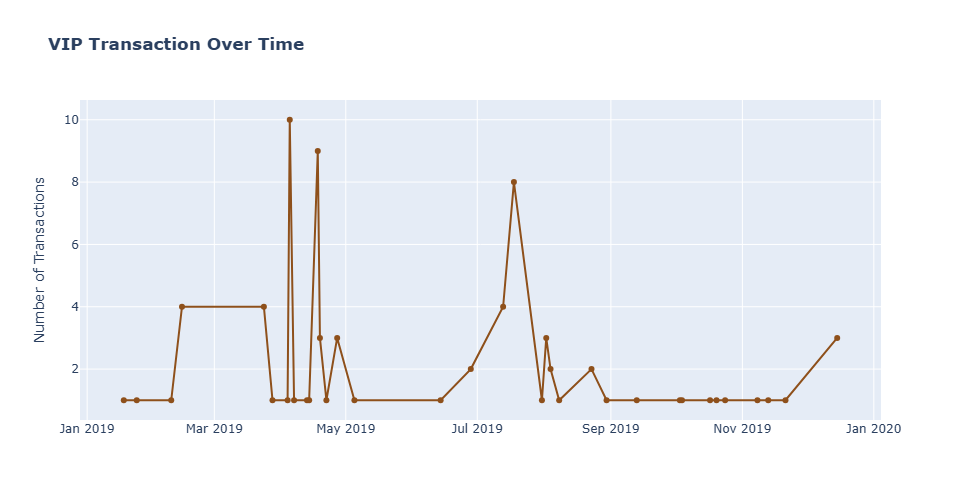

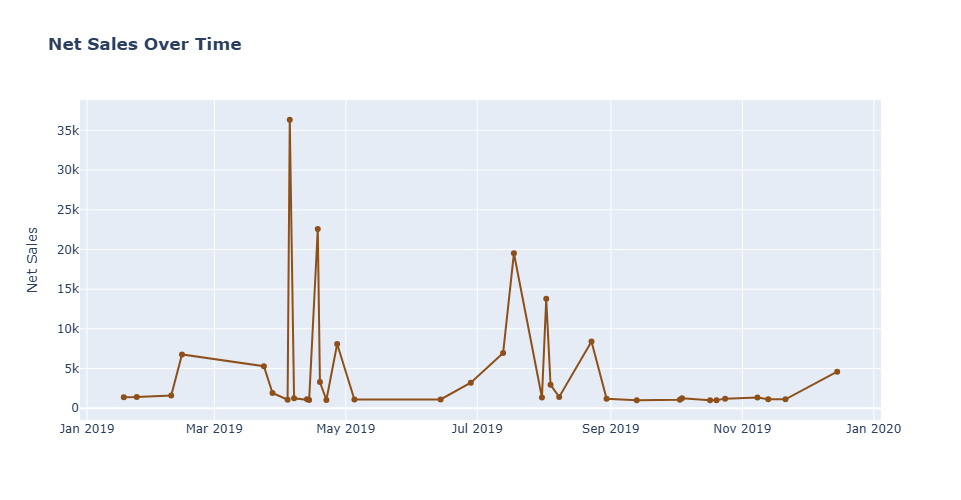

In [51]:
fig1 = px.line(daily_counts, x="Transaction_Date", y="transaction_count", markers=True, title="<b>VIP Transaction Over Time</b>", width=900, height=500)
fig1.update_layout(xaxis_title="", yaxis_title="Number of Transactions")
fig1.update_traces(line_color = "#8e501b")
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("transactions_overtime.png")  
Image("transactions_overtime.png")

fig2 = px.line(daily_sales, x="Transaction_Date", y="net_sales", markers=True, title="<b>Net Sales Over Time</b>", width=900, height=500)
fig2.update_layout(xaxis_title="", yaxis_title="Net Sales")
fig2.update_traces(line_color = "#8e501b")
# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("sales_overtime.png")  
Image("sales_overtime.png")

fig1.show()
fig2.show()

#### Day of the week

In [52]:
vip["DayOfWeek"] = vip["Transaction_Date"].dt.day_name()

#number of transactions per day
day_counts = vip["DayOfWeek"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
day_counts.columns = ["DayOfWeek", "TransactionCount"]


#total transaction amount per day
day_sales = vip.groupby("DayOfWeek")["net_sales"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()


In [53]:
day_counts

,DayOfWeek,TransactionCount
0,Monday,1.0
1,Tuesday,NaN
2,Wednesday,2.0
3,Thursday,29.0
4,Friday,26.0
5,Saturday,9.0
6,Sunday,13.0


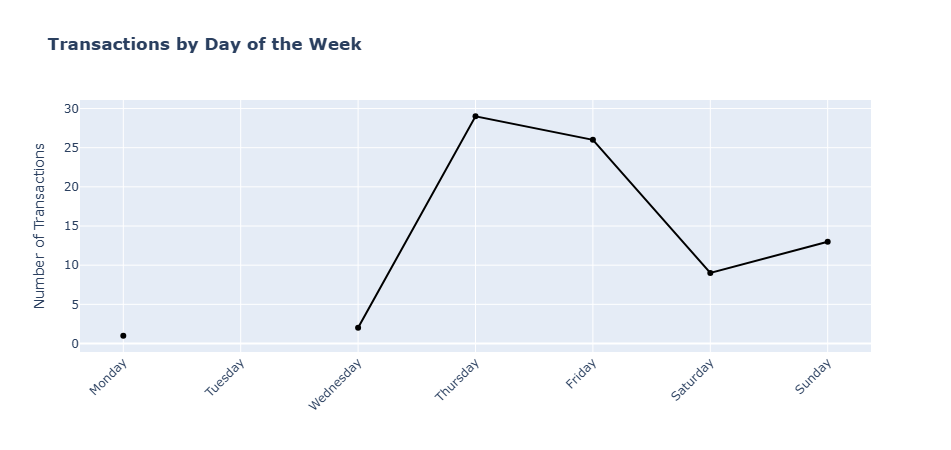

In [54]:
# daily transactions

fig = px.line(
    day_counts,
    x="DayOfWeek",
    y="TransactionCount",
    markers=True,
    title="<b>Transactions by Day of the Week</b>",
    width=600,
    height=450
)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Number of Transactions"
)

fig.update_xaxes(tickangle= -45)
fig.update_traces(line_color = "black")

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("trans_dayofweek.png")  
Image("trans_dayofweek.png")
fig.show()

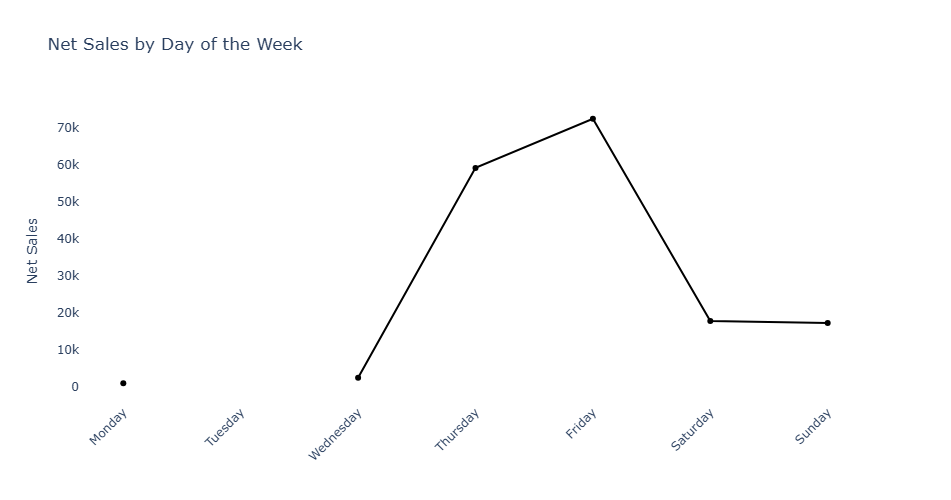

In [55]:
#net daily sales
fig = px.line(
    day_sales,
    x="DayOfWeek",
    y="net_sales",
    markers=True,
    title="Net Sales by Day of the Week",
    width=650,
    height=500
)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Net Sales",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(tickangle= -45)
fig.update_traces(line_color = "black")

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("sales_dayofweek.png")  
Image("sales_dayofweek.png")
fig.show()

## How do Sales Vary by Segment?

In [56]:
by_segment = df.groupby("segment").agg({
    "net_sales": "sum",
    "Transaction_ID": "count",
    "Quantity": "sum",
    "Online_Spend": "sum",
    "Offline_Spend": "sum"
}).sort_values("net_sales", ascending = False).reset_index()

by_segment

,segment,net_sales,Transaction_ID,Quantity,Online_Spend,Offline_Spend
0,Loyalty Tier,1416308.385,20991,75438,39431334.66,59007000
1,Premium Tier,1352027.974,17332,90120,32940508.27,49873600
2,VIP Tier,485205.163,4208,37587,8520094.14,12330400
3,Regular,464125.725,9993,33222,18599886.03,27559500


In [57]:
#save the df to csv so that we can export it to power Bi or Tableau
df.to_csv("marketing_df.csv", index = False)

*authored by frida*